In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from herec.utils import *

In [2]:
import os
import shutil
import mlflow
from glob import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import polars as pl
import re
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
from IPython.display import display
from scipy import stats

from dotenv import load_dotenv
load_dotenv("../.env")

import sys
sys.path.append("..")
from herec.utils import resultLoader

In [3]:
def labeler(s):

    if s == "HE_MF":
        return "HE-MF"
    if s == "MF_BPR":
        return "MF-BPR"
    if s == "HE_MF_USER_BPR":
        return "HE$_{USER}$-MF-BPR"
    if s == "HE_MF_ITEM_BPR":
        return "HE$_{ITEM}$-MF-BPR"
    if s == "HE_MF_BPR":
        return "HE-MF-BPR"

    return s

## On Explicit Feedback

In [4]:
modelNameList = ["MF", "HE_MF"]
datasetNameList = ["ML100K", "ML1M", "Ciao_PART", "Ciao", "Yelp"]

Experiment Name: ML100K-MF-TRAIN
Experiment ID: 71
Trial #: 100
Experiment Name: ML100K-HE_MF-TRAIN
Experiment ID: 81
Trial #: 100


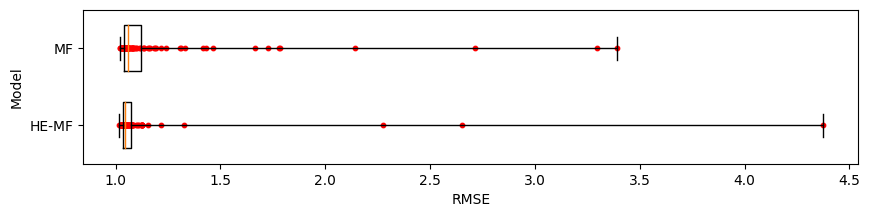

Experiment Name: ML1M-MF-TRAIN
Experiment ID: 75
Trial #: 100
Experiment Name: ML1M-HE_MF-TRAIN
Experiment ID: 88
Trial #: 100


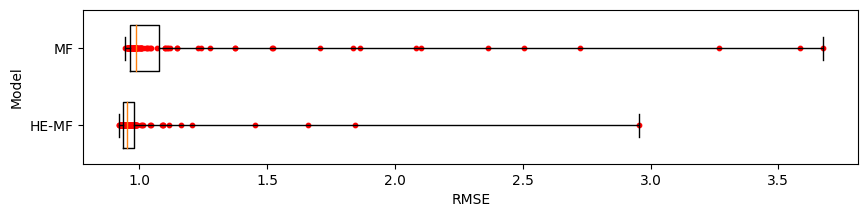

Experiment Name: Ciao_PART-MF-TRAIN
Experiment ID: 72
Trial #: 100
Experiment Name: Ciao_PART-HE_MF-TRAIN
Experiment ID: 92
Trial #: 100


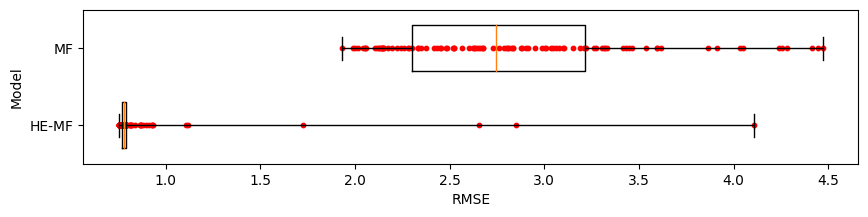

Experiment Name: Ciao-MF-TRAIN
Experiment ID: 97
Trial #: 100
Experiment Name: Ciao-HE_MF-TRAIN
Experiment ID: 130
Trial #: 100


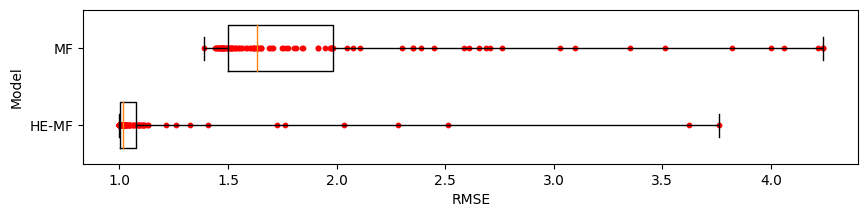

Experiment Name: Yelp-MF-TRAIN
Experiment ID: 161
Trial #: 100
Experiment Name: Yelp-HE_MF-TRAIN
Experiment ID: 164
Trial #: 100


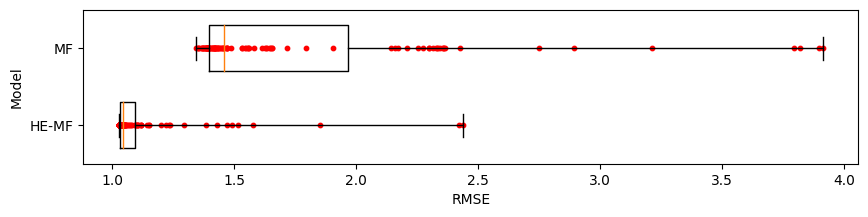

In [5]:
for datasetName in datasetNameList:

    fig, ax = plt.subplots(figsize=(10, 2))

    for pos_i, modelName in enumerate(modelNameList):

        # Get (best) valid. loss
        loader = resultLoader(f"{datasetName}-{modelName}-TRAIN")
        values = loader.get_results_by_fold(0).get_column("metrics.BEST_VALID_LOSS").to_numpy()
        values = np.sqrt(values)
        print("Trial #:", len(values))
        
        # BoxPlot
        ax.boxplot( values, vert=False, widths=0.6, whis=(0, 100), labels=[labeler(modelName)], positions = [-pos_i] )

        # Scatter
        ax.scatter( values, np.ones_like(values)*(-pos_i), s=10, c="red" )

        # Adjust Layout
        ax.set_xlabel( 'RMSE' )
        ax.set_ylabel( 'Model' )

    plt.savefig(f"RATING_{datasetName}.pdf", bbox_inches="tight")
    plt.show()

## On Implicit Feedback

In [6]:
modelNameList = ["MF_BPR", "HE_MF_USER_BPR", "HE_MF_ITEM_BPR", "HE_MF_BPR"]
datasetNameList = ["ML100K_IMPLICIT", "ML1M_IMPLICIT", "Twitch100K", "FourSquare"]

Experiment Name: ML100K_IMPLICIT-MF_BPR-TRAIN
Experiment ID: 98
Trial #: 100
Experiment Name: ML100K_IMPLICIT-HE_MF_USER_BPR-TRAIN
Experiment ID: 103
Trial #: 100
Experiment Name: ML100K_IMPLICIT-HE_MF_ITEM_BPR-TRAIN
Experiment ID: 106
Trial #: 100
Experiment Name: ML100K_IMPLICIT-HE_MF_BPR-TRAIN
Experiment ID: 101
Trial #: 100


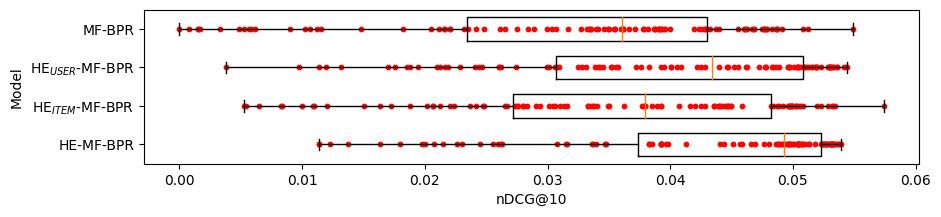

Experiment Name: ML1M_IMPLICIT-MF_BPR-TRAIN
Experiment ID: 99
Trial #: 100
Experiment Name: ML1M_IMPLICIT-HE_MF_USER_BPR-TRAIN
Experiment ID: 123
Trial #: 100
Experiment Name: ML1M_IMPLICIT-HE_MF_ITEM_BPR-TRAIN
Experiment ID: 141
Trial #: 100
Experiment Name: ML1M_IMPLICIT-HE_MF_BPR-TRAIN
Experiment ID: 110
Trial #: 100


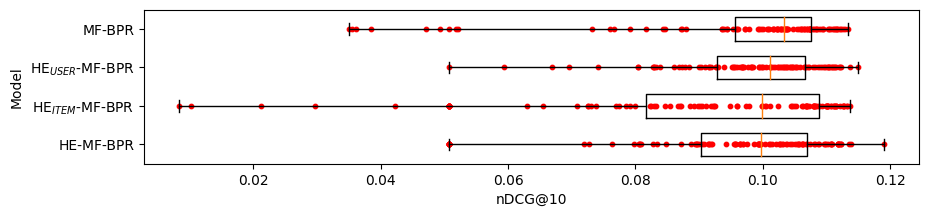

Experiment Name: Twitch100K-MF_BPR-TRAIN
Experiment ID: 104
Trial #: 100
Experiment Name: Twitch100K-HE_MF_USER_BPR-TRAIN
Experiment ID: 220
Trial #: 100
Experiment Name: Twitch100K-HE_MF_ITEM_BPR-TRAIN
Experiment ID: 188
Trial #: 100
Experiment Name: Twitch100K-HE_MF_BPR-TRAIN
Experiment ID: 201
Trial #: 100


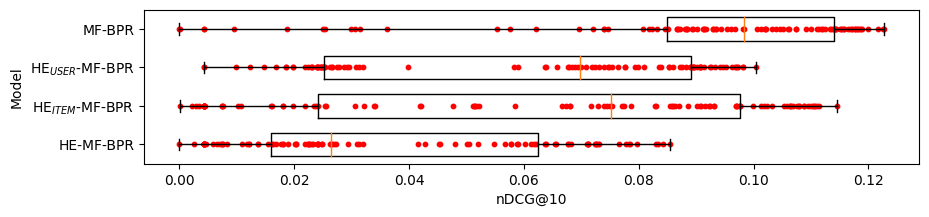

Experiment Name: FourSquare-MF_BPR-TRAIN
Experiment ID: 236
Trial #: 100
Experiment Name: FourSquare-HE_MF_USER_BPR-TRAIN
Experiment ID: 244
Trial #: 100
Experiment Name: FourSquare-HE_MF_ITEM_BPR-TRAIN
Experiment ID: 237
Trial #: 100
Experiment Name: FourSquare-HE_MF_BPR-TRAIN
Experiment ID: 242
Trial #: 100


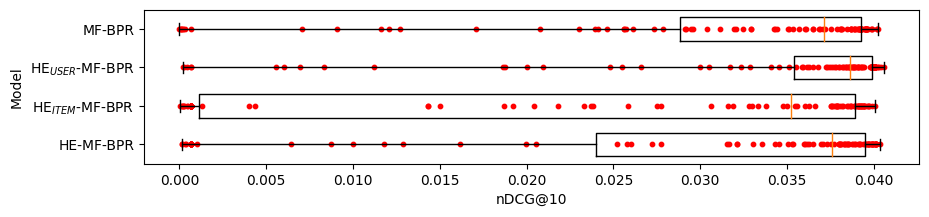

In [7]:
for datasetName in datasetNameList:

    fig, ax = plt.subplots(figsize=(10, 2))

    for pos_i, modelName in enumerate(modelNameList):

        # Get (best) valid. loss
        loader = resultLoader(f"{datasetName}-{modelName}-TRAIN")
        values = loader.get_results_by_fold(0).get_column("metrics.nDCG_10").to_numpy()
        print("Trial #:", len(values))
        
        # BoxPlot
        ax.boxplot( values, vert=False, widths=0.6, whis=(0, 100), labels=[labeler(modelName)], positions = [-pos_i] )

        # Scatter
        ax.scatter( values, np.ones_like(values)*(-pos_i), s=10, c="red" )

        # Adjust Layout
        ax.set_xlabel( 'nDCG@10' )
        ax.set_ylabel( 'Model' )

    plt.savefig(f"RANKING_{datasetName}.pdf", bbox_inches="tight")
    plt.show()